<a target="_blank" href="https://colab.research.google.com/github/LBL-EESA/fastkde/blob/version2_draft/examples/fastKDE%20-%20Berkely%20Lab%20Logo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook demonstrates using fastKDE on a complex mixture of distributions.  This remakes Figure 4 of O'Brien et al. (2016)

O’Brien, T. A., Kashinath, K., Cavanaugh, N. R., Collins, W. D. & O’Brien, J. P. *A fast and objective multidimensional kernel density estimation method: fastKDE.* Comput. Stat. Data Anal. 101, 148–160 (2016). [http://dx.doi.org/10.1016/j.csda.2016.02.014](http://dx.doi.org/10.1016/j.csda.2016.02.014)

In [1]:
""" Install libraries if needed. """
try:
    import fastkde
    import xarray
except:
    # install fastkde
    !pip install --upgrade fastkde
    import fastkde

In [2]:
""" Import libraries. """
import pylab as PP
import matplotlib as mpl
import fastkde
from fastkde.convergence_tests import testMixtureModel
import numpy as np

In [3]:
""" Sample from the Berkeley Lab logo mixture distribution. """
test_mix = testMixtureModel()
mix_samples1 = test_mix.sampleFromDistribution(int(1e6))
mix_samples2 = test_mix.sampleFromDistribution(int(1e4))

In [4]:
""" Calculate the PDFs. """
pdf1 = fastkde.pdf(
    mix_samples1[0, :], mix_samples1[1, :], var_names=["x", "y"], num_points=513
)
pdf2 = fastkde.pdf(
    mix_samples2[0, :], mix_samples2[1, :], var_names=["x", "y"], num_points=513
)

In [5]:
""" Calculate the values of the true PDF. """
mixPDStandard = test_mix.pdfStandard([pdf1.x, pdf1.y])

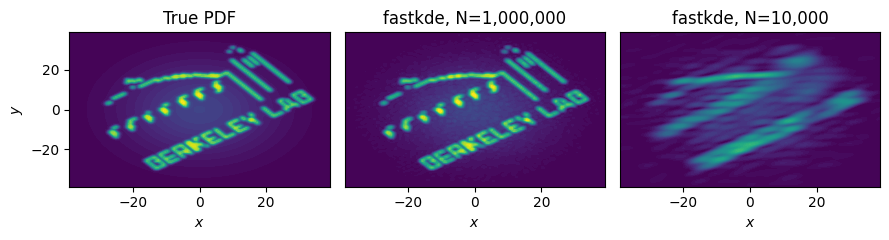

In [6]:
""" Create the figure. """
# Initialize a figure with 3 subplots in a row
fig, axs = PP.subplots(1, 3, figsize=(9, 2.5))

# Set x/y limits
xlim = [-39, 39]
ylim = [-39, 39]

# Draw the standard PDF contours
topPlot = axs[0].contourf(pdf1.x, pdf1.y, mixPDStandard, 64)

# Draw the KDE contours
axs[1].contourf(pdf1.x, pdf1.y, pdf1, levels=topPlot.levels)
axs[2].contourf(pdf2.x, pdf2.y, pdf2, levels=topPlot.levels)

# Set x/y limits and labels
for i in range(3):
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xlabel("$x$")
axs[0].set_ylabel("$y$")

# Turn off y-ticks for the last 2 plots
for i in (1, 2):
    axs[i].axes.get_yaxis().set_ticks([])

# add titles
axs[0].set_title("True PDF")
axs[1].set_title(f"fastkde, N={int(1e6):,}")
axs[2].set_title(f"fastkde, N={int(1e4):,}")

PP.tight_layout()
PP.show()